<a href="https://colab.research.google.com/github/hardik1057/Netflix_data_analytics/blob/main/Netflix_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Importing & installing libraries

In [ ]:
!pip install opendatasets --upgrade

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

## 2. Downloading Netflix Data

In [ ]:
od.download('https://www.kaggle.com/datasets/shivamb/netflix-shows')
#{"username":"abhinavaakash","key":"81442d96ad09b7529917d303a9047157"}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abhinavaakash
Your Kaggle Key: ··········


100%|██████████| 1.34M/1.34M [00:00<00:00, 105MB/s]

In [ ]:
netflix_data = pd.read_csv("/content/netflix-shows/netflix_titles.csv")

In [ ]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 2.1 Priniting basic information about dataset


In [ ]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### 2.2 Printing the statistics

In [ ]:
netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
netflix_data.shape

(8807, 12)

### 2.3 Checking for the duplicates

In [ ]:
netflix_data.duplicated().sum()

0

### 2.4 Checking for `NULL` values and removing them

In [ ]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
netflix_data.dropna(inplace=True)

In [ ]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


### 2.6 Converting the `date_time` to respective values

In [ ]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
netflix_data['day_added'] = netflix_data['date_added'].dt.day
netflix_data['year_added'] = netflix_data['date_added'].dt.year
netflix_data['month_added'] = netflix_data['date_added'].dt.month
netflix_data['year_added'].astype(int)
netflix_data['day_added'].astype(int)

7       24
8       24
9       24
12      23
24      21
        ..
8801     9
8802    20
8804     1
8805    11
8806     2
Name: day_added, Length: 5332, dtype: int64

In [ ]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",24,2021,9
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,24,2021,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,24,2021,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,23,2021,9
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,21,2021,9


## 3. Data Visualization

Movie      5185
TV Show     147
Name: type, dtype: int64


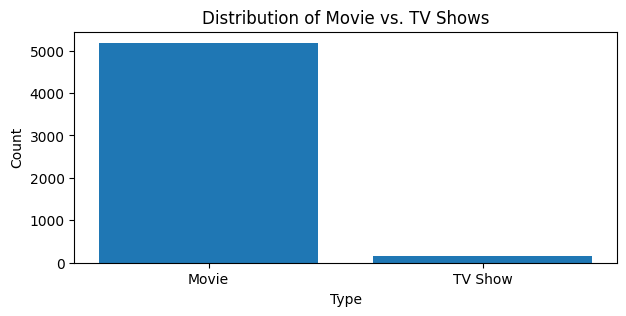

In [ ]:
type_counts = netflix_data['type'].value_counts()
print(type_counts)
plt.figure(figsize=(7, 3))
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Movie vs. TV Shows')
plt.show()

          show_id  type  title  director  cast  country  date_added  \
rating                                                                
G              40    40     40        40    40       40          40   
NC-17           2     2      2         2     2        2           2   
NR             58    58     58        58    58       58          58   
PG            275   275    275       275   275      275         275   
PG-13         470   470    470       470   470      470         470   
R             778   778    778       778   778      778         778   
TV-14        1214  1214   1214      1214  1214     1214        1214   
TV-G           84    84     84        84    84       84          84   
TV-MA        1822  1822   1822      1822  1822     1822        1822   
TV-PG         431   431    431       431   431      431         431   
TV-Y           76    76     76        76    76       76          76   
TV-Y7          76    76     76        76    76       76          76   
TV-Y7-

<ipython-input-18-8c18771bcdfe>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=netflix_data_rating, x='type', y='rating', palette='magma')


Text(0, 0.5, 'Rating')

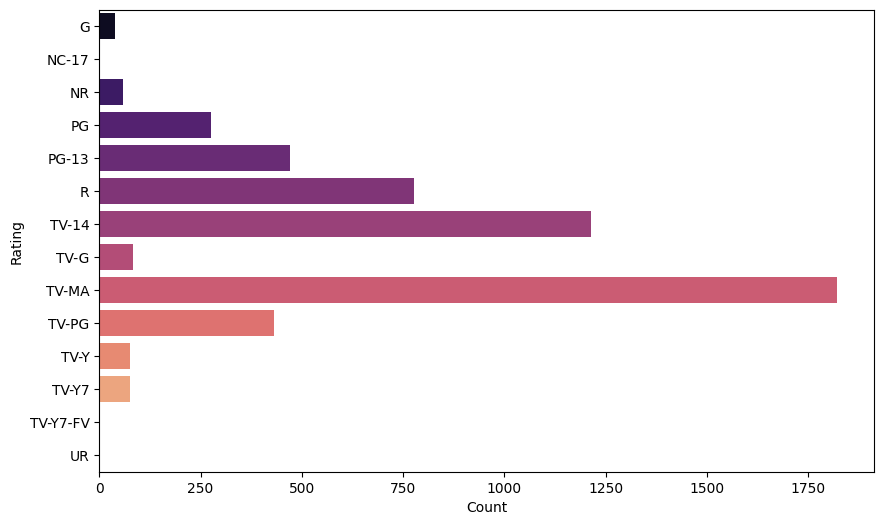

In [ ]:
plt.figure(figsize=(10 ,6))
netflix_data_rating = netflix_data.groupby('rating').count()
print(netflix_data_rating)
sns.barplot(data=netflix_data_rating, x='type', y='rating', palette='magma')
plt.xlabel('Count')
plt.ylabel('Rating')

1     1519
2      208
3       88
4      102
5      154
6      124
7      105
8      110
9       78
10     123
11      84
12     107
13     100
14     106
15     408
16     188
17      96
18     114
19     142
20     139
21     114
22     113
23     104
24      88
25     119
26     126
27     118
28     111
29      77
30     102
31     165
Name: day_added, dtype: int64


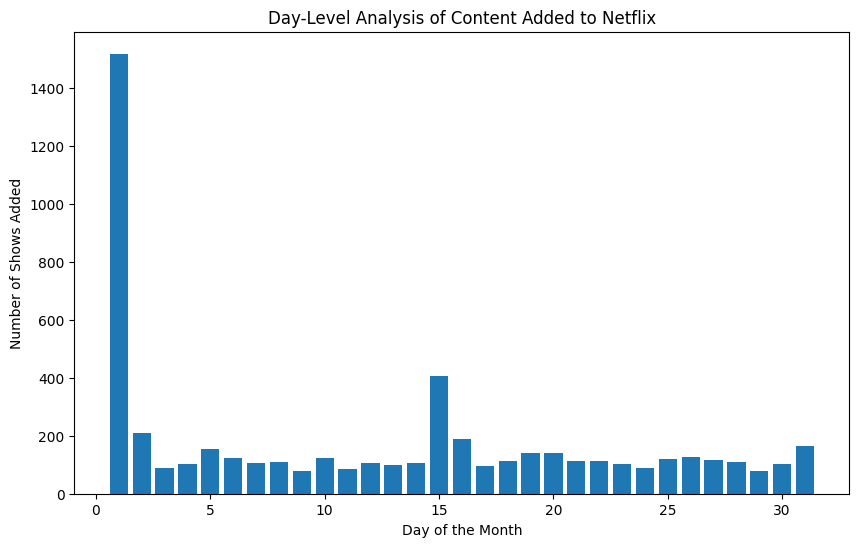

In [ ]:
day_counts = netflix_data['day_added'].value_counts().sort_index()
print(day_counts)
plt.figure(figsize=(10, 6))
plt.bar(day_counts.index, day_counts.values)
plt.xlabel('Day of the Month')
plt.ylabel('Number of Shows Added')
plt.title('Day-Level Analysis of Content Added to Netflix')
plt.show()

1     489
2     341
3     469
4     471
5     368
6     415
7     464
8     449
9     427
10    491
11    458
12    490
Name: month_added, dtype: int64


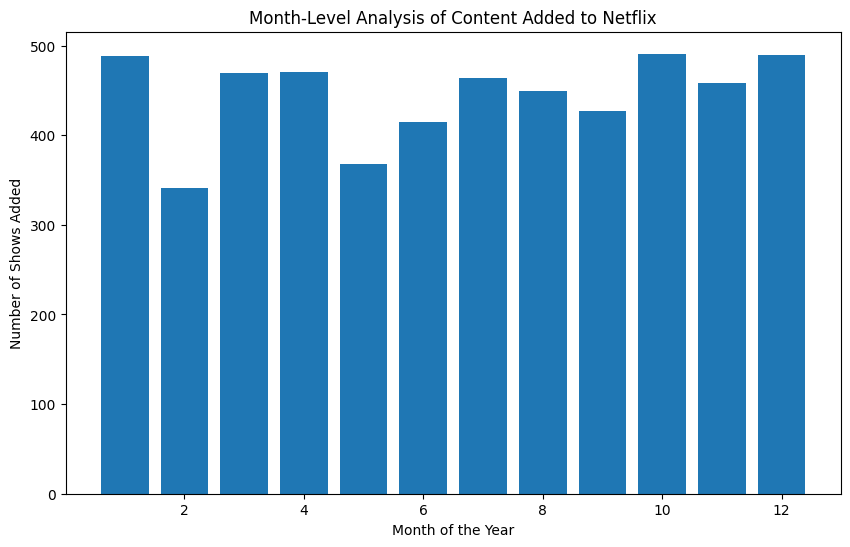

In [ ]:
month_counts = netflix_data['month_added'].value_counts().sort_index()
print(month_counts)
plt.figure(figsize=(10, 6))
plt.bar(month_counts.index, month_counts.values)
plt.xlabel('Month of the Year')
plt.ylabel('Number of Shows Added')
plt.title('Month-Level Analysis of Content Added to Netflix')
plt.show()

2008       1
2009       2
2010       1
2011      13
2012       3
2013       7
2014      14
2015      50
2016     202
2017     724
2018    1101
2019    1265
2020    1194
2021     755
Name: year_added, dtype: int64


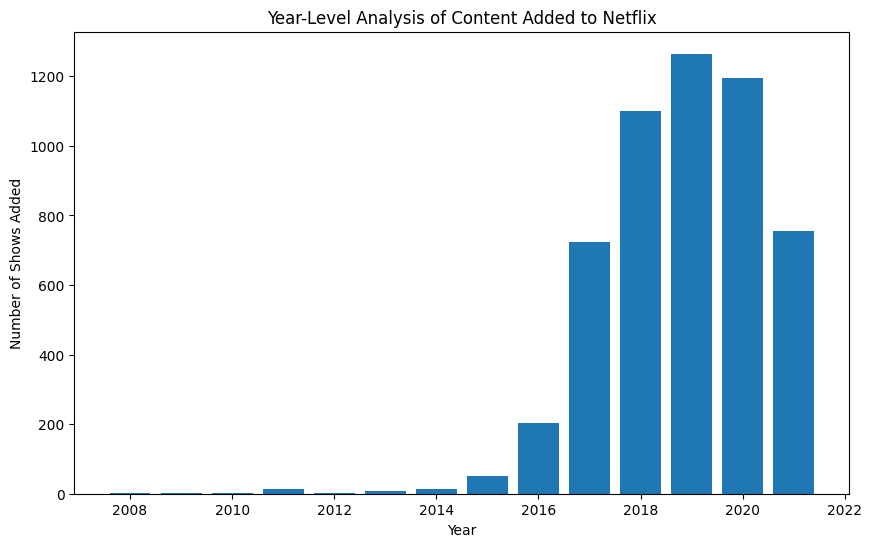

In [ ]:
year_counts = netflix_data['year_added'].value_counts().sort_index()
print(year_counts)
plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Shows Added')
plt.title('Year-Level Analysis of Content Added to Netflix')
plt.show()

          show_id  type  title  director  cast  country  date_added  \
rating                                                                
G              40    40     40        40    40       40          40   
NC-17           2     2      2         2     2        2           2   
NR             58    58     58        58    58       58          58   
PG            275   275    275       275   275      275         275   
PG-13         470   470    470       470   470      470         470   
R             778   778    778       778   778      778         778   
TV-14        1214  1214   1214      1214  1214     1214        1214   
TV-G           84    84     84        84    84       84          84   
TV-MA        1822  1822   1822      1822  1822     1822        1822   
TV-PG         431   431    431       431   431      431         431   
TV-Y           76    76     76        76    76       76          76   
TV-Y7          76    76     76        76    76       76          76   
TV-Y7-

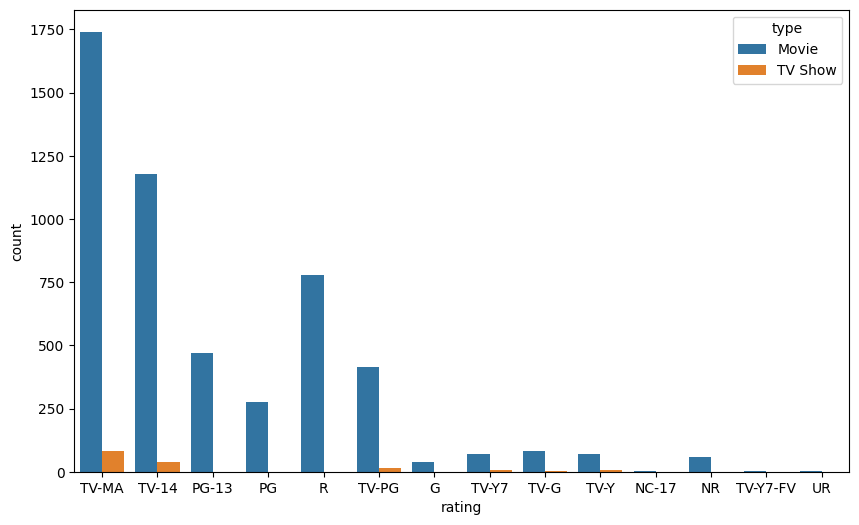

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='rating',hue='type',data=netflix_data)
netfliX_data_rating = netflix_data.groupby(['rating', 'type']).size().reset_index(name='count')
print(netflix_data_rating)
# plt.title('Relation between Type and Rating')
# plt.legend()
# plt.show()